In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import zscore
from windrose import WindroseAxes
import os

In [2]:
df = pd.read_csv('data/benin-malanville.csv')

In [ ]:
summary_stats = df.describe()
missing_values = df.isna().sum()
null_thresh = len(df) * 0.05
cols_gt_5pct_nulls = missing_values[missing_values > null_thresh]

print("Summary Statistics")
display(summary_stats)

print("Missing Values Count")
display(missing_values)

print("Columns >5% Nulls")
display(cols_gt_5pct_nulls)


Summary Statistics


,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


Missing Values Count


Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

Columns >5% Nulls


Comments    525600
dtype: int64

In [ ]:
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
z_scores = df[columns_to_check].apply(zscore)

# Flag outliers with |Z| > 3
outliers = (z_scores.abs() > 3)
print("Outlier counts per column (|Z| > 3):")
display(outliers.sum())  # Number of outliers per column

# Mark rows that contain any outliers
df['OutlierFlag'] = outliers.any(axis=1)
print(f"Total rows flagged as outliers: {df['OutlierFlag'].sum()} out of {len(df)}")


Outlier counts per column (|Z| > 3):


GHI         89
DNI          0
DHI       3738
ModA        27
ModB        63
WS        3109
WSgust    3500
dtype: int64

Total rows flagged as outliers: 7740 out of 525600


In [5]:
# Impute with median for key columns
df[columns_to_check] = df[columns_to_check].fillna(df[columns_to_check].median())

In [ ]:
os.makedirs("data", exist_ok=True)
df.to_csv("data/cleaned/benin_clean.csv", index=False)

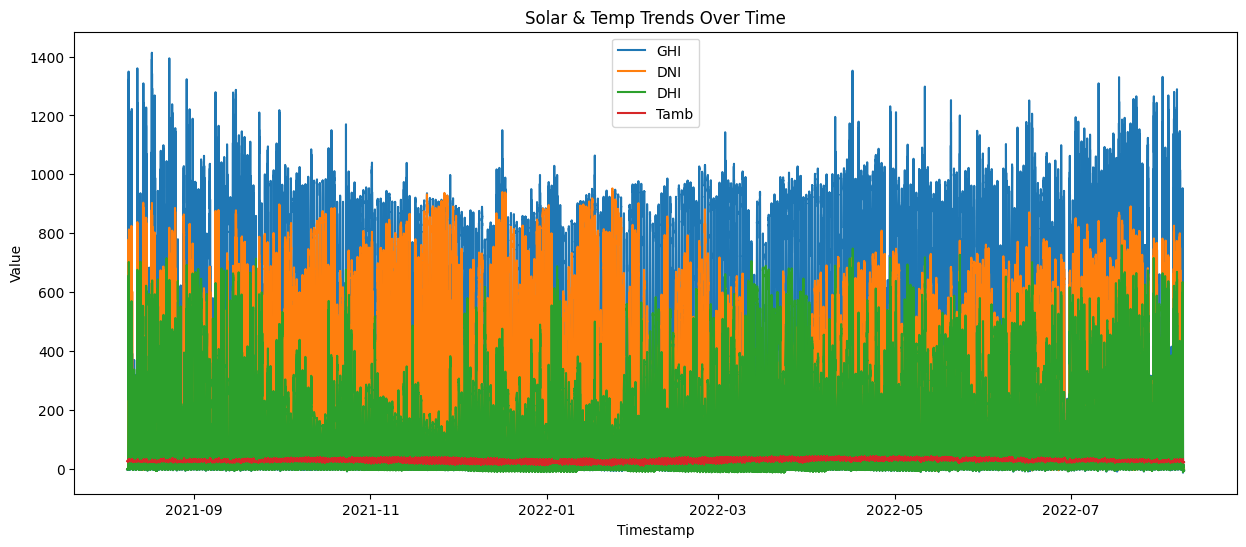

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Plot GHI, DNI, DHI, Tamb
plt.figure(figsize=(15, 6))
for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
    plt.plot(df['Timestamp'], df[col], label=col)
plt.legend()
plt.title("Solar & Temp Trends Over Time")
plt.xlabel("Timestamp")
plt.ylabel("Value")
plt.show()


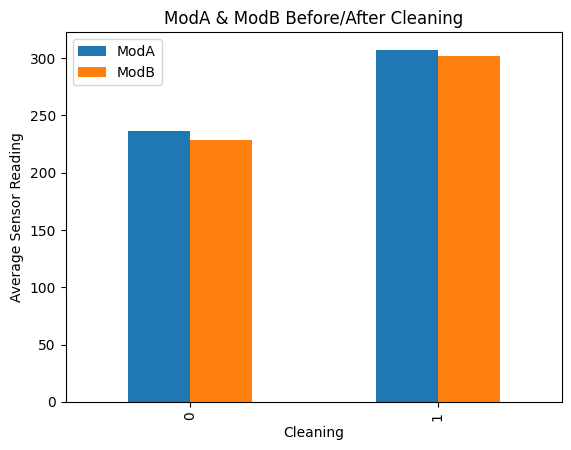

In [8]:
# Assuming a column like 'Cleaned' exists (True/False or Yes/No)
df['Cleaning'] = df['Cleaning'].astype(str)

# Group and plot average ModA & ModB
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar', title='ModA & ModB Before/After Cleaning')
plt.ylabel("Average Sensor Reading")
plt.show()


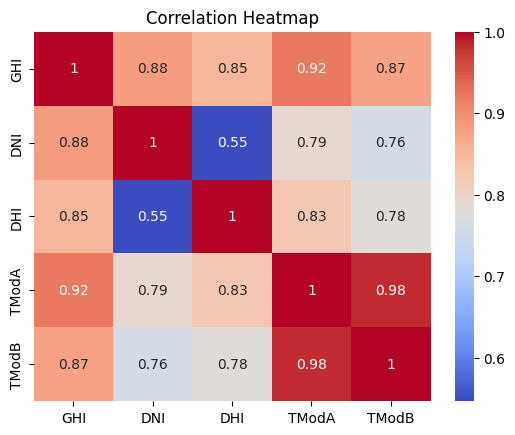

In [9]:
import seaborn as sns

sns.heatmap(df[['GHI', 'DNI', 'DHI', 'TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


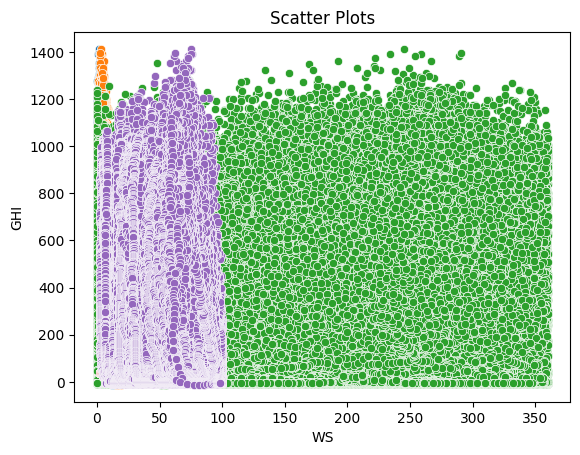

In [10]:
sns.scatterplot(x='WS', y='GHI', data=df)
sns.scatterplot(x='WSgust', y='GHI', data=df)
sns.scatterplot(x='WD', y='GHI', data=df)
sns.scatterplot(x='RH', y='Tamb', data=df)
sns.scatterplot(x='RH', y='GHI', data=df)
plt.title("Scatter Plots")
plt.show()


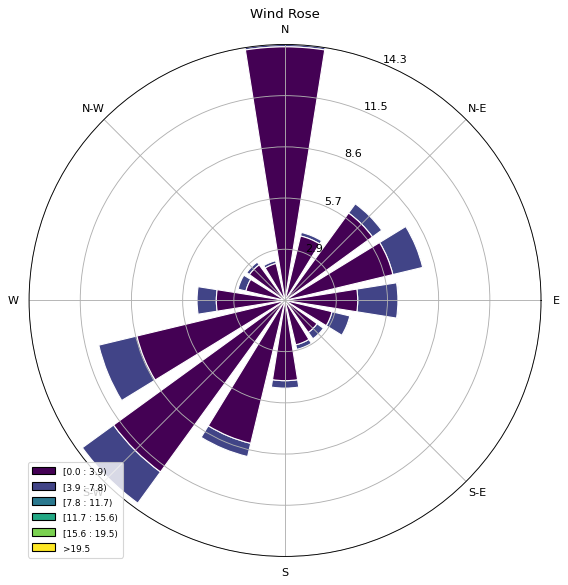

In [11]:
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title("Wind Rose")
plt.show()


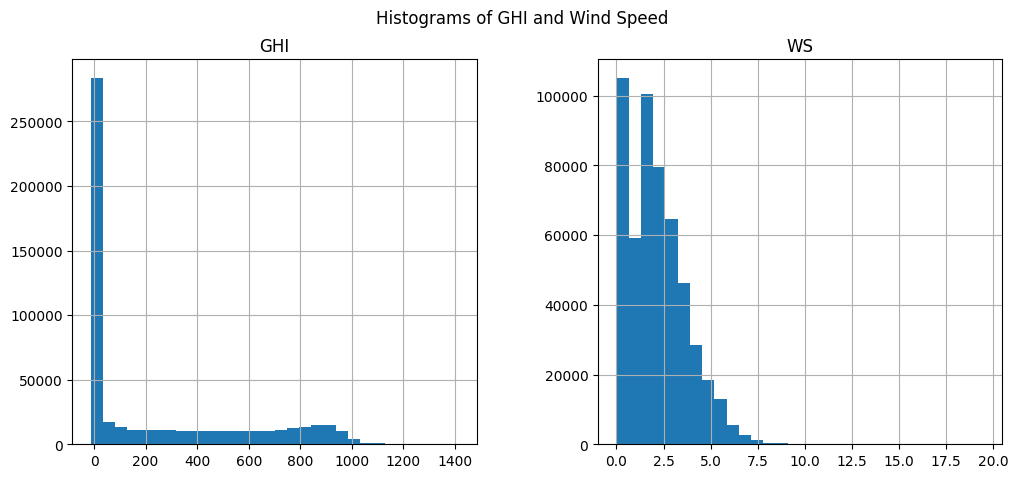

In [12]:
df[['GHI', 'WS']].hist(bins=30, figsize=(12, 5))
plt.suptitle("Histograms of GHI and Wind Speed")
plt.show()


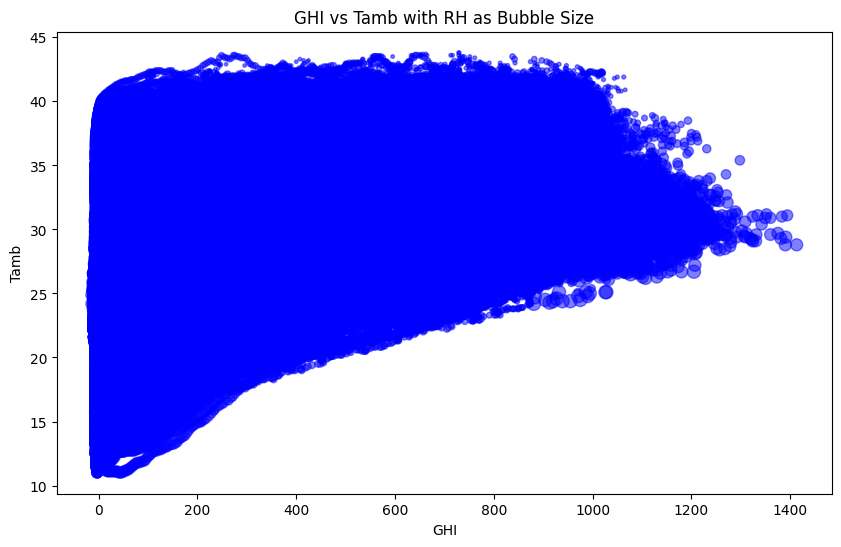

In [13]:
# Bubble Chart
plt.figure(figsize=(10, 6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5, c='blue')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('GHI vs Tamb with RH as Bubble Size')
plt.show()
